# numpy基础

### 七月在线python数据分析集训营 julyedu.com

褚则伟 zeweichu@gmail.com

## 目录
- 文件输入输出
- 线性代数运算
- 随堂小项目：用Numpy写一个Softmax

## numpy的文件输入输出
### 七月在线python数据分析集训营 julyedu.com

读取csv文件作为数组

In [1]:
import numpy as np
arr = np.loadtxt('array_ex.txt', delimiter=',')
print(arr)

[[ 0.580052  0.18673   1.040717  1.134411]
 [ 0.194163 -0.636917 -0.938659  0.124094]
 [-0.12641   0.268607 -0.695724  0.047428]
 [-1.484413  0.004176 -0.744203  0.005487]
 [ 2.302869  0.200131  1.670238 -1.88109 ]
 [-0.19323   1.047233  0.482803  0.960334]]


还有一个常用的把文本数据转换成ndarray的方法叫做genfromtxt

In [2]:

arr = np.genfromtxt(BytesIO(open('array_ex.txt')), delimiter=",")
print(arr)

NameError: name 'BytesIO' is not defined

数组文件读写

In [3]:
arr = np.arange(10)
np.save('some_array', arr)

In [4]:
print(np.load('some_array.npy'))

[0 1 2 3 4 5 6 7 8 9]


多个数组可以一起压缩存储

In [5]:
arr2 = np.arange(15).reshape(3,5)
np.savez('array_archive.npz', a=arr, b=arr2)

In [6]:
arch = np.load('array_archive.npz')
print(arch['a'])
print(arch['b'])

[0 1 2 3 4 5 6 7 8 9]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


## numpy和scipy的相关数学运算
### 七月在线python数据分析集训营 julyedu.com

In [7]:
import numpy as np

那如果我要做矩阵的乘法运算怎么办！！！恩，别着急，照着下面写就可以了:

[matrix multiplication](http://mathworld.wolfram.com/MatrixMultiplication.html)

In [8]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
v = np.array([9,10])
w = np.array([11, 12])
print(x)
print(y)

[[ 1.  2.]
 [ 3.  4.]]
[[ 5.  6.]
 [ 7.  8.]]


求向量内积

In [9]:
print(v.dot(w))
print(np.dot(v, w))

219
219


矩阵的乘法

In [10]:
print(x.dot(v))
print(np.dot(x, v))

[ 29.  67.]
[ 29.  67.]


In [11]:
print(x.dot(y))
print(np.dot(x, y))

[[ 19.  22.]
 [ 43.  50.]]
[[ 19.  22.]
 [ 43.  50.]]


向量的内积[inner](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.inner.html#numpy.inner)

In [12]:
np.inner(x, y)

array([[ 17.,  23.],
       [ 39.,  53.]])

In [13]:
X = np.arange(24).reshape(2,3,4)
Y = np.arange(12).reshape(3,4)
np.inner(X, Y)

array([[[ 14,  38,  62],
        [ 38, 126, 214],
        [ 62, 214, 366]],

       [[ 86, 302, 518],
        [110, 390, 670],
        [134, 478, 822]]])

In [14]:
X = np.arange(24).reshape(2,3,4)
Y = np.arange(16).reshape(4,4)
np.inner(X, Y).shape

(2, 3, 4)

转置和数学公式一样，简单粗暴

In [15]:
print(x)
print(x.T)

[[ 1.  2.]
 [ 3.  4.]]
[[ 1.  3.]
 [ 2.  4.]]


In [16]:
需要说明一下，1维的vector转置还是自己

SyntaxError: invalid character in identifier (<ipython-input-16-378d2b0ccc75>, line 1)

In [17]:
v = np.array([1,2,3])
print(v)
print(v.T)

[1 2 3]
[1 2 3]


2维的就不一样了

In [18]:
w = np.array([[1,2,3]])
print(w)
print(w.T)

[[1 2 3]]
[[1]
 [2]
 [3]]


利用转置矩阵做dot product

In [19]:
arr = np.random.randn(6,3)
print(np.dot(arr.T, arr))

[[  3.25570055   0.34061858  -0.66837506]
 [  0.34061858   4.34204493  -0.08812162]
 [ -0.66837506  -0.08812162  12.28257546]]


In [20]:
print(np.dot(arr, arr))

ValueError: shapes (6,3) and (6,3) not aligned: 3 (dim 1) != 6 (dim 0)

高维的tensor也可以做转置

In [21]:
arr = np.arange(16).reshape((2, 2, 4))
print(arr)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


In [22]:
print(arr.transpose((1,0,2)))

[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]


In [23]:
print(arr.swapaxes(1,2))

[[[ 0  4]
  [ 1  5]
  [ 2  6]
  [ 3  7]]

 [[ 8 12]
  [ 9 13]
  [10 14]
  [11 15]]]


### [matmul](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.matmul.html#numpy.matmul)

非常常用，用于计算矩阵乘法

In [24]:
import numpy as np

In [25]:
x = np.arange(24).reshape(2,3,4)
y = np.arange(8).reshape(4,2)
print(np.matmul(x,y))

[[[ 28  34]
  [ 76  98]
  [124 162]]

 [[172 226]
  [220 290]
  [268 354]]]


In [26]:
print(np.dot(x, y))

[[[ 28  34]
  [ 76  98]
  [124 162]]

 [[172 226]
  [220 290]
  [268 354]]]


In [27]:
x1 = np.arange(12).reshape(3,4)
print(np.matmul(x1, y))
x2 = np.arange(12,24).reshape(3,4)
print(np.matmul(x2, y))

[[ 28  34]
 [ 76  98]
 [124 162]]
[[172 226]
 [220 290]
 [268 354]]


In [28]:
y = np.arange(16).reshape(2,4,2)
print(x.dot(y).shape)

(2, 3, 2, 2)


In [29]:
print(np.matmul(x,y).shape)

(2, 3, 2)


In [30]:
x = np.arange(24).reshape(2,3,4)
y = np.arange(16).reshape(2,4,2)
print(np.matmul(x,y))

[[[  28   34]
  [  76   98]
  [ 124  162]]

 [[ 604  658]
  [ 780  850]
  [ 956 1042]]]


In [31]:
x = np.arange(24).reshape(2,3,4) 
y = np.arange(8).reshape(1,4,2)
print(np.matmul(x,y))

[[[ 28  34]
  [ 76  98]
  [124 162]]

 [[172 226]
  [220 290]
  [268 354]]]


In [32]:
print("x", x[0], x[1])
print(y)

x [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] [[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
[[[0 1]
  [2 3]
  [4 5]
  [6 7]]]


### [outer product](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.outer.html)

与数学中的定义一样，outer product就是两个向量酸外积，变成了一个矩阵

In [33]:
a = np.linspace(-5,5,3)
b = np.arange(2,5)
np.outer(a, b)

array([[-10., -15., -20.],
       [  0.,   0.,   0.],
       [ 10.,  15.,  20.]])

### 一些更高级的线性代数操作

计算determinant

In [34]:
x = np.array([[1, 5], [2, 1]])
np.linalg.det(x)

-9.0000000000000018

计算inverse

In [35]:
x_inv = np.linalg.inv(x)
print("x_inv", x_inv)
np.dot(x, x_inv)

x_inv [[-0.11111111  0.55555556]
 [ 0.22222222 -0.11111111]]


array([[  1.00000000e+00,   5.55111512e-17],
       [  0.00000000e+00,   1.00000000e+00]])

计算pseudo-inverse

In [36]:
x = np.array([[1,2,3], [2,4,6], [1,3,5]])
np.linalg.det(x)

0.0

In [37]:
x_inv = np.linalg.inv(x)

LinAlgError: Singular matrix

In [38]:
x_pinv = np.linalg.pinv(x)
print("x_pinv", x_pinv)

x_pinv [[ 0.43333333  0.86666667 -1.33333333]
 [ 0.13333333  0.26666667 -0.33333333]
 [-0.16666667 -0.33333333  0.66666667]]


In [39]:
np.dot(x, x_pinv)

array([[  2.00000000e-01,   4.00000000e-01,   0.00000000e+00],
       [  4.00000000e-01,   8.00000000e-01,   0.00000000e+00],
       [  1.11022302e-16,   0.00000000e+00,   1.00000000e+00]])

计算Matrix的[norm](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.norm.html#numpy.linalg.norm)

In [40]:
x = np.arange(15).reshape(3,5)
np.linalg.norm(x, "fro")

31.859064644147981

In [41]:
np.sqrt(np.sum(x**2))

31.859064644147981

In [42]:
np.linalg.norm(x, np.inf)

60.0

计算singular value decomposition (SVD)

In [43]:
U, s, V = np.linalg.svd(x)

In [44]:
np.dot(U, U.T)

array([[  1.00000000e+00,   0.00000000e+00,  -2.77555756e-17],
       [  0.00000000e+00,   1.00000000e+00,  -5.55111512e-17],
       [ -2.77555756e-17,  -5.55111512e-17,   1.00000000e+00]])

In [45]:
np.dot(V, V.T)

array([[  1.00000000e+00,  -1.07948583e-16,   5.91865369e-17,
         -4.17545215e-17,  -4.14054997e-17],
       [ -1.07948583e-16,   1.00000000e+00,  -1.25162789e-16,
         -1.68536677e-17,   5.08778614e-18],
       [  5.91865369e-17,  -1.25162789e-16,   1.00000000e+00,
          4.99764062e-17,  -8.35727138e-17],
       [ -4.17545215e-17,  -1.68536677e-17,   4.99764062e-17,
          1.00000000e+00,  -8.67263621e-17],
       [ -4.14054997e-17,   5.08778614e-18,  -8.35727138e-17,
         -8.67263621e-17,   1.00000000e+00]])

In [46]:
s

array([  3.17420265e+01,   2.72832424e+00,   8.33338143e-16])

## numpy简单的作图
### 七月在线python数据分析集训营 julyedu.com

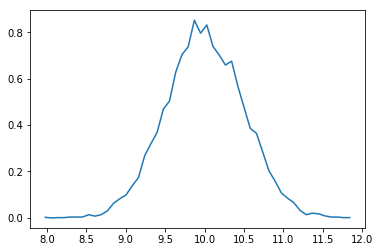

In [47]:
import matplotlib.pyplot as plt
mu = 10
sigma = 0.5 
v = np.random.normal(mu, sigma, 10000)
n, bins = np.histogram(v, bins=50, normed=True)
plt.plot(.5*(bins[1:]+bins[:-1]), n)
plt.show()


## 随堂小项目

### 七月在线python数据分析集训营 julyedu.com

用numpy写一个softmax

[什么是softmax?](http://cs231n.github.io/linear-classify/#softmax)

In [48]:
import numpy as np
m = np.random.rand(10, 10) * 10 + 1000
print(m)

[[ 1009.03960456  1000.28966207  1007.0243779   1005.12220239
   1002.88437093  1008.84302621  1009.51564452  1004.52647942
   1007.62835009  1008.12790242]
 [ 1003.55735494  1001.23541286  1007.98665582  1009.49467382
   1002.31208185  1007.62423241  1007.39623205  1004.85250709
   1008.49656807  1003.80373337]
 [ 1009.55551008  1001.83598146  1000.82767674  1009.83673379
   1000.46585151  1002.29082922  1008.02347323  1001.54300225  1002.5740486
   1003.26800962]
 [ 1003.98037258  1008.25950365  1000.73334725  1006.18337055
   1005.91710081  1003.29850781  1009.37108919  1000.71425167
   1006.56877464  1004.29557635]
 [ 1009.52417036  1005.76606876  1001.65168779  1000.34081781
   1003.53449811  1002.72862727  1000.80267248  1009.70808009
   1007.96610372  1000.50550359]
 [ 1005.48887008  1002.22319984  1000.76703623  1005.11631226
   1006.19447414  1006.16004298  1001.07526485  1005.16117179
   1001.39018188  1002.61539398]
 [ 1004.08661371  1003.84655825  1003.65662011  1000.817456

In [49]:
print(np.exp(m))

[[ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]]


/Users/zeweichu/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


In [50]:
m_row_max = m.max(axis=1)
print(m_row_max, m_row_max.shape)

[ 1009.51564452  1009.49467382  1009.83673379  1009.37108919  1009.70808009
  1006.19447414  1009.81171013  1009.42206593  1009.38249775  1007.44010259] (10,)


In [51]:
m = m - m_row_max
print(m)

[[ -4.76039960e-01  -9.20501175e+00  -2.81235589e+00  -4.24888680e+00
   -6.82370916e+00   2.64855206e+00  -2.96065608e-01  -4.89558651e+00
   -1.75414766e+00   6.87799827e-01]
 [ -5.95828958e+00  -8.25926095e+00  -1.85007797e+00   1.23584629e-01
   -7.39599824e+00   1.42975827e+00  -2.41547808e+00  -4.56955883e+00
   -8.85929673e-01  -3.63636923e+00]
 [  3.98655546e-02  -7.65869236e+00  -9.00905705e+00   4.65644603e-01
   -9.24222857e+00  -3.90364492e+00  -1.78823690e+00  -7.87906367e+00
   -6.80844914e+00  -4.17209297e+00]
 [ -5.53527194e+00  -1.23517017e+00  -9.10338654e+00  -3.18771864e+00
   -3.79097927e+00  -2.89596633e+00  -4.40620942e-01  -8.70781425e+00
   -2.81372310e+00  -3.14452624e+00]
 [  8.52583931e-03  -3.72860506e+00  -8.18504600e+00  -9.03027138e+00
   -6.17358197e+00  -3.46584687e+00  -9.00903765e+00   2.86014159e-01
   -1.41639402e+00  -6.93459900e+00]
 [ -4.02677444e+00  -7.27147398e+00  -9.06969756e+00  -4.25477693e+00
   -3.51360594e+00  -3.44311628e-02  -8.73644

In [52]:
m_exp = np.exp(m)
print(m_exp, m_exp.shape)

[[  6.21238657e-01   1.00534285e-04   6.00633229e-02   1.42801218e-02
    1.08767906e-03   1.41335593e+01   7.43738631e-01   7.47952116e-03
    1.73054682e-01   1.98933384e+00]
 [  2.58432847e-03   2.58850223e-04   1.57224907e-01   1.13154576e+00
    6.13703750e-04   4.17768918e+00   8.93246242e-02   1.03625303e-02
    4.12330662e-01   2.63478335e-02]
 [  1.04067085e+00   4.71924116e-04   1.22297121e-04   1.59304074e+00
    9.68614866e-05   2.01682655e-02   1.67254797e-01   3.78587373e-04
    1.10440435e-03   1.54199529e-02]
 [  3.94513565e-03   2.90785275e-01   1.11288288e-04   4.12659061e-02
    2.25734854e-02   5.52456136e-02   6.43636636e-01   1.65289140e-04
    5.99812597e-02   4.30873321e-02]
 [  1.00856229e+00   2.40263278e-02   2.78791604e-04   1.19729997e-04
    2.08375865e-03   3.12465324e-02   1.22299494e-04   1.33111130e+00
    2.42587206e-01   9.73513369e-04]
 [  1.78317546e-02   6.95086697e-04   1.15101344e-04   1.41962572e-02
    2.97893021e-02   9.66154845e-01   1.60623

In [53]:
m_exp_row_sum = m_exp.sum(axis = 1).reshape(10,1)
print(m_exp_row_sum, m_exp_row_sum.shape)

[[ 17.74393632]
 [  6.00828239]
 [  2.83872868]
 [  1.16079722]
 [  2.64111175]
 [  1.05141959]
 [  2.59145055]
 [  2.77195164]
 [  7.2511982 ]
 [  0.57733734]] (10, 1)


In [54]:
m_softmax = m_exp / m_exp_row_sum
print(m_softmax)

[[  3.50113214e-02   5.66583891e-06   3.38500555e-03   8.04788830e-04
    6.12986339e-05   7.96528971e-01   4.19150868e-02   4.21525473e-04
    9.75289126e-03   1.12113445e-01]
 [  4.30127665e-04   4.30822332e-05   2.61680288e-02   1.88330989e-01
    1.02142960e-04   6.95321710e-01   1.48669151e-02   1.72470760e-03
    6.86270444e-02   4.38525219e-03]
 [  3.66597505e-01   1.66244883e-04   4.30816521e-05   5.61181049e-01
    3.41214317e-05   7.10468234e-03   5.89189092e-02   1.33365114e-04
    3.89048928e-04   5.43199249e-03]
 [  3.39864326e-03   2.50504800e-01   9.58722898e-05   3.55496252e-02
    1.94465364e-02   4.75928203e-02   5.54478099e-01   1.42392777e-04
    5.16724701e-02   3.71187416e-02]
 [  3.81870357e-01   9.09705083e-03   1.05558428e-04   4.53331808e-05
    7.88970271e-04   1.18308256e-02   4.63060656e-05   5.03996585e-01
    9.18504134e-02   3.68599840e-04]
 [  1.69596940e-02   6.61093535e-04   1.09472322e-04   1.35019903e-02
    2.83324585e-02   9.18905116e-01   1.52768

In [55]:
print(m_softmax.sum(axis=1))

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


更多的numpy细节和用法可以查看一下官网[numpy指南](http://docs.scipy.org/doc/numpy/reference/)